### Half-Spin

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.transforms as transforms

In [2]:
N = 2                            # Length of Hilbert Space
tmin=0
tmax=10
psi0=basis(N,0)                  # Spin up
psi1=basis(N,1)                  # Spin down
psi2=psi0+psi1
psi2=psi2.unit()                 #superposition of |0>+|1>
psi3=psi0-psi1 
psi3=psi3.unit()                 #superposition of |0>-|1>
psi4=-psi0+psi1
psi4=psi4.unit()                 #superposition of -|0>+|1>
psi5=-psi0-psi1
psi5=psi5.unit()                 #superposition of -|0>-|1>

####  Only Dephasing

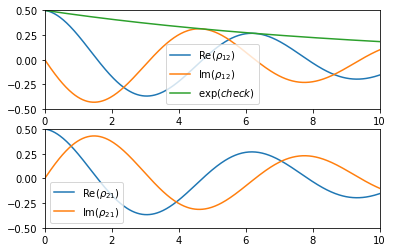

In [3]:
wl = 1                           # Angular frequency
delta_w = 0.05                  # Uncertainty
H =0.5* wl * sigmaz()            # Hamiltonion magnetic field in the z direction
C_ops = [np.sqrt(delta_w)*sigmaz()]      # Collapse Operator
times = np.linspace(tmin,tmax,400)    # Time of measurement
result = mesolve(H, psi2, times, C_ops)
plt.figure()
plt.subplot(211)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)

plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{12}$)');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{12}$)' );
plt.plot(times,0.5*np.exp(-2*delta_w*times), label=r'exp($check$)');
plt.legend()
plt.subplot(212)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{21}$)');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{21}$)');
plt.legend()

In [4]:
wl = 1                           # Angular frequency
delta_w = 0.15                   # Uncertainty
H = wl* 0.5*sigmaz()             # Hamiltonion
C_ops = [delta_w *sigmaz()]      # Collapse Operator

def update_ang_freq(freq):
    wl=freq
    return(wl)

def update_uncertainty(uncertainty,freq):
#    wl=update_ang_freq(freq) 
    delta_w=uncertainty*wl
    return(delta_w) 

def update_spin_up(up):      ## It Works :), it glitches at [ 0,0] which makes sense, sadly it start at [0,0]
    psi_up= up*basis(N,0)
    return(psi_up)


def update_spin_down(down,up,uncertainty,freq):
    psi_up=update_spin_up(up)
    psi_total=down*basis(N,1)+psi_up 
    psi_total=psi_total.unit()
    print(psi_total) 
    wl=update_ang_freq(freq) 
    H = wl* 0.5*sigmaz()
    delta_w=update_uncertainty(uncertainty,freq)     
    C_ops = [delta_w *sigmaz()] 
    result = mesolve(H, psi_total, times, C_ops)
    plt.figure()
    plt.subplot(211)
    plt.ylim(-0.5, 0.5)
    plt.xlim(tmin, tmax)
    plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$)');
    plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{12}$)' );
    plt.legend()
    plt.subplot(212)
    plt.ylim(-0.5, 0.5)
    plt.xlim(tmin, tmax)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{21}$)');
    plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{21}$)');
    plt.legend() 

interact(update_spin_down,freq=(0,1,0.01),uncertainty=(0,1,0.01)  ,down=(-1,1,0.01), up=(-1,1,0.01));     

interactive(children=(FloatSlider(value=0.0, description='down', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

#### Decay with dephasing

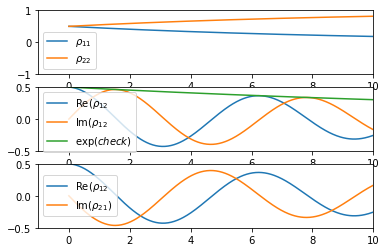

In [5]:
w = 1 
H = 0.5 * w * sigmaz()
gamma = 0.1 * wl
C_ops = [np.sqrt(gamma) * sigmam()]
result = mesolve(H, psi2, times, C_ops)
plt.figure()
plt.subplot(311)
plt.ylim(-1, 1)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
plt.legend()
plt.subplot(312)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-gamma/2*times), label=r'exp($check$)');
plt.legend() 
plt.subplot(313)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 

In [6]:
def update_spin_up(up):     
    psi_up= up*basis(N,0)
    return(psi_up)

def update_spin_down(down,up):
    psi_up=update_spin_up(up)
    psi_total=down*basis(N,1)+psi_up 
    psi_total=psi_total.unit()
    print(psi_total) 
    gamma = 0.1 * wl
    C_ops = [np.sqrt(gamma) * sigmaz()]
    result = mesolve(H, psi_total, times, C_ops)
    plt.figure()
    plt.subplot(311)
    plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
    plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
    plt.legend()
    plt.subplot(312)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
    plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
    plt.legend() 
    plt.subplot(313)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
    plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
    plt.legend() 

interact(update_spin_down,down=(-1,1,0.01), up=(-1,1,0.01));    

interactive(children=(FloatSlider(value=0.0, description='down', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

####  Thermal Decoherence with dephasing

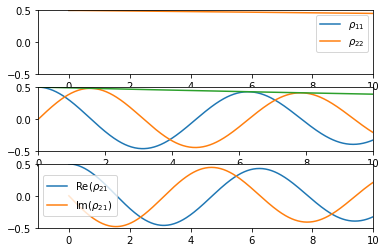

In [7]:
kb=1.38e-23
T=1000
wl = 1 
nther=1/(np.exp(wl/kb*T)-1) 
H = 0.5 * wl * sigmaz()
gamma = 0.01
gamma_plus = gamma*(1+nther)
gamma_minus = gamma*nther

C_ops = [np.sqrt(gamma_minus) * sigmam(),np.sqrt(gamma) * sigmaz(),np.sqrt(gamma_plus) * sigmap()]
result = mesolve(H,psi2 , times, C_ops)

plt.figure()
plt.subplot(311)

plt.xlim(tmin-1, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
plt.legend()
plt.subplot(312)

plt.xlim(tmin, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-2*(gamma +gamma_minus/2+gamma_plus/4)*times), label=r'exp($check$)');
#plt.legend() 
plt.subplot(313)

plt.xlim(tmin-1, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 

### Thermal Bath from a spin

In [8]:
N = 4               # number of basis states to consider
kappa = 1.0/0.129   # coupling to heat bath
nth = 0.063         # temperature with <n>=0.063 Find the one for spins

tlist = np.linspace(0,0.6,100)
# collapse operator list
c_op_list = []

a = destroy(N)      # cavity destruction operator
H = a.dag() * a     # harmonic oscillator Hamiltonian
psi0 = basis(N,1)   # initial Fock state with one photon: |1>


# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

# collapse operator list
c_op_list = []

# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

ntraj = [1, 5, 15, 904] # list of number of trajectories to avg. over
mc = mcsolve(H, psi0, tlist, c_op_list, [a.dag()*a], ntraj)
# run master equation to get ensemble average expectation values
me = mesolve(H, psi0, tlist, c_op_list, [a.dag()*a])


# collapse operator list
c_op_list = []

# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

ntraj = [1, 5, 15, 904] # list of number of trajectories to avg. over
mc = mcsolve(H, psi0, tlist, c_op_list, [a.dag()*a], ntraj)
# run master equation to get ensemble average expectation values
me = mesolve(H, psi0, tlist, c_op_list, [a.dag()*a])

10.1%. Run time:   4.11s. Est. time left: 00:00:00:36
20.0%. Run time:   4.53s. Est. time left: 00:00:00:18
30.1%. Run time:   4.92s. Est. time left: 00:00:00:11
40.0%. Run time:   5.33s. Est. time left: 00:00:00:07
50.0%. Run time:   5.77s. Est. time left: 00:00:00:05
60.1%. Run time:   6.14s. Est. time left: 00:00:00:04
70.0%. Run time:   6.56s. Est. time left: 00:00:00:02
80.1%. Run time:   6.95s. Est. time left: 00:00:00:01
90.0%. Run time:   7.33s. Est. time left: 00:00:00:00
100.0%. Run time:   7.74s. Est. time left: 00:00:00:00
Total run time:   7.81s
10.1%. Run time:   4.10s. Est. time left: 00:00:00:36
20.0%. Run time:   4.55s. Est. time left: 00:00:00:18
30.1%. Run time:   5.04s. Est. time left: 00:00:00:11
40.0%. Run time:   5.41s. Est. time left: 00:00:00:08
50.0%. Run time:   5.79s. Est. time left: 00:00:00:05
60.1%. Run time:   6.18s. Est. time left: 00:00:00:04
70.0%. Run time:   6.56s. Est. time left: 00:00:00:02
80.1%. Run time:   6.95s. Est. time left: 00:00:00:01
90.

In [9]:


# calulate final state using steadystate solver
final_state = steadystate(H, c_op_list) # find steady-state
fexpt = expect(a.dag()*a, final_state)  # find expectation value for particle number
import matplotlib.font_manager
leg_prop = matplotlib.font_manager.FontProperties(size=10)

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(8,12))

fig.subplots_adjust(hspace=0.1) # reduce space between plots

for idx, n in enumerate(ntraj):

    axes[idx].step(tlist, mc.expect[idx][0], 'b', lw=2)
    axes[idx].plot(tlist, me.expect[0], 'r--', lw=1.5)
    axes[idx].axhline(y=fexpt, color='k', lw=1.5)
    
    axes[idx].set_yticks(np.linspace(0, 2, 5))
    axes[idx].set_ylim([0, 1.5])
    axes[idx].set_ylabel(r'$\left<N\right>$', fontsize=14)
    
    if idx == 0:
        axes[idx].set_title("Ensemble Averaging of Monte Carlo Trajectories")
        axes[idx].legend(('Single trajectory', 'master equation', 'steady state'), prop=leg_prop)
    else:
        axes[idx].legend(('%d trajectories' % n, 'master equation', 'steady state'), prop=leg_prop)
        

axes[3].xaxis.set_major_locator(plt.MaxNLocator(4))
axes[3].set_xlabel('Time (sec)',fontsize=14);

OSError: exception: access violation reading 0x0000000000000008

### Thermal bath of a spin qubit

In [ ]:
N = 2                            # Length of Hilbert Space
tmin=0
tmax=10
wl = 1                           # Angular frequency
delta_w = 0.05                  # Uncertainty
H =0.5* wl * sigmaz()
times = np.linspace(tmin,tmax,400)
psi0 = basis(N,1)

In [ ]:
kb=1.38e-23
T=1000
wl = 1 
nther=1/(np.exp(wl/kb*T)-1) 
gamma = 0.01
gamma_plus = gamma*(1+nther)
gamma_minus = gamma*nther
C_ops_list = []

C_ops_list.append (np.sqrt(gamma_minus) * sigmam())

C_ops_list.append (np.sqrt(gamma) * sigmaz()) 

C_ops_list.append (np.sqrt(gamma_plus) * sigmap())
mc = mcsolve(H, psi0, times, C_ops_list)

In [ ]:
me =mesolve(H, psi0, times,  C_ops_list)
final_state = steadystate(H, C_ops_list)
# fexpt = expect( , final_state) ?


### GG

## Introduction
In this project we will look at the different causes of  decoherence for the spin 1/2 qubit. The cases in which we will look at are: pure dephasing, pure decay and therminal decoherence. 

##  Description of the physical problem we want to simulate


The pure dephasing happens when the qubit spin 1/2 is placed in a magnetic field that fluctuates in time and we assume that there is no other intoraction with the system. The fluctuations lead to the fluctuations in larmor frequency $\omega_l = g\mu_bB_o$ of the spin 1/2. If we look at the frequency domain we will observe laurensian shape of the frequency around wl. This variance in the frequency denotes the uncertainty as time goes on it becomes harder to know what frequency of the 1/2 spin qubit is. "Classically" you can imagine this as a pendalum with a dampening that changes in time. Since we aren't measuring it you can also imagine a box covering the pandelum. Since the dampening factor changes in time it becomes very difficult to know what the current frequency is. Ofcource eventually it becomes zero due to dampening over time, however this can be ignored for this example. As it is known from 1/2 spin qubits there exist pure, mixed en completely mixed. The meaning behind this as you go from pure towards mixed you know less about the 1/2 spin qubits and when you reach completely mixed you know nothing more about the 1/2 spin qubit. Decoherence means that the off-diagonal of a state are 0. Mixed states have the characteristic of having off diagonals of zero. So just like the "classical" example for a pandalum the phase of the 1/2 spin qubit becomes less certain over time due to the fluctuating magnetic field. As a result the off diagonls of the spins density matrix heads towards zero.          

The pure deacaying happens when the spin 1/2 decays with some decay rate from the exited state to ground state. In this case we have a non fluctuating magnetic field. However in this case we are going to measure the  1/2 spin qubit. We will want to know if it is a spin up or spin down. The question arraies how it is lead to dephasing?. You can measure the spin up or spin down of a photon in a magnetic field. Due to the fact that you are measuring it you will collaps it. The collaps operator is depends on if you are measuring spin up or spin down. If the initial state is spin up, due to colapse operator the average over time will be spin down. Before measurement the 1/2 spin had a fixed frequency, due to the fact that the magnetic field is not fluctuating. Measurement adds a form of exponantial decay, the decay explains how the diagonals change over time. Therefor the total representation of the wave function is $\phi=e^{-a}*cos(b)$. The a and b are arbitrary.The exponential does not change the phase only the magnitute. However if the Fourier transform is preform on $\phi$ the result is a pulse. This means that the frequency of the 1/2 spin qubit in the perfect magnetic field changes due to measurement. As the case with the fluctuating magnetic field as you keep measuring the spin the state will eventually be pure mixed. It is also important to note that for pure decay the condintion $T_2 = 2T_1$ have to be met, where T1 and T2 are respectivly decay period of the diagonal and off-diagonal elements of the density matrix  shown below. 

$$
\textbf{$\rho$} = 
\begin{pmatrix}
\rho_{11}e^{-1/T_1}\ \rho_{12}e^{-1/T_2}\\
\rho_{21}e^{-1/T_2}\ \rho_{22}e^{-1/T_1}
\end{pmatrix}
$$

The last source of decoherence we are going to look at is envoiremental i.e 'thermal bath'. The  1/2 spin qubit in the enviroment can give energy to it ,but it can also absorb energy from it. If the temerature is zero. The 1/2 spin qubit can only take energy and if the temperature approaches infinity we would assume that the qubit spin 1/2 would only get energy. However the boltsman statistics suggests that is not the case. When working with the envoirnment you have to use boltzman statistic as a tool to figurate the thermal occupation number or in short $n_{th}$. As taking energy can be seen as being in the excited state and giving energy can be seen as being in the ground state. Depending on the environment.As you try to measure if the 1/2 spin qubit is eiter giving or receiving energy you are once again effecting it. After a few measurements the spin will be in a completely mixed state. What's interesting about this is the rate in which the spin becomes decoherent. 


$$
n_{th} = \frac{1}{1-e^{\hbar/k_bT}}
$$

## Aim and scope of this project

With this project we are trying to understand how different sources of decoherence affect qubit spin 1/2 by finding the answerse to following questions:

1. How to simmulate pure depasing that is the result of the fluctuations of the magnetic field?
2. What is a good model of pure decay? 
3. a) What are the requerments to properly simmulate 'therminal bath' of qubit spin 1/2? 
3. b) How does the envoirment affects the decoherence of the qubit spin 1/2. 

## Techniques and approach

First the model of the qubit spin 1/2 will be created with help of `basis()` funciton. The created superposition will be normalized with `unit()`. This sate is used for all simmulation. The evolution of the state is then determined with the Linblad equation `mesolve()`, where we use collapse operators to simmualte physical enviroment. The Hamiltonian of our system is $ H =\frac{\omega_l\sigma_z}{2} $

### Simualting pure dephasing
To simmulate pire dephasing we need an collapse operator that has the eigenstate coresponding to our qubit spin 1/2. We know that forunately als a pauli matric $\sigma_z$. The total collapse operator is

$$
C_{dephasing} = \sqrt{\gamma}\sigma_z 
$$

where $\gamma$ is the collapse rate. Since we are modeling the fluctions in frequency $\Delta\omega$ we can replace $\gamma$ by $\Delta\omega$. The decoherence should decay as $e^{-\Delta\omega t}$. 


### Simulating pure decoherence

To simmulate pure decoherence we use collapse operator
$$
C_{decay} = \sqrt{\gamma}\sigma_-
$$
where $\gamma = \frac{1}{T_{decay}}$. $T_{decay}$ is the rate at which the quibit spin 1/2 decay from higer energy to lower energy. If we solve the linblad manually we observe that the off-diagonal elements of $\rho$ should decay as $e^{-\frac{\gamma t}{2}}$ 

### Therminal decoherence
Since the qubit spin 1/2 gains and loses energy we will use the following collapse operators $\alpha_-\sigma_-$ and $\alpha_+\sigma_+$. The  $\alpha_+$ and  $\alpha_-$ is some function of  $n_{th}$. If T is zero then only the enviroment gains energy from spin 1/2. The $n_{th}$ is zero at that T = 0. This means that  $\alpha_+ = \sqrt{\gamma n_{th}}$ and $\alpha_- = \sqrt{\gamma (n_{th}+1)}$. The dephasing should decay with  $\gamma (n_{th}+1) + \gamma (n_{th})$



## Results
### Pure dephasing
The plot below shows the evolution of the off-diagonal elements of the $\rho$ matrix and the exponantial decay function $e^{-\Delta\omega t}$ with the collapse operator $C_{dephasing}$ where $\Delta\omega = 0.05 $ and $\omega_l = 1$. The plots shows indeed that the fluctions of the off diagonal elements dephase and the dephasing follow the exponential $e^{-\Delta\omega t}$.
<img src="Plots/pure_dephasing_offdia.png" width=60%>
### Pure decay
From the plot that is represented below we can conclude that the pure decay indeed leads to the dephasing of the system and it is only vailid when $2T_2 = T_1$. The green and the blue lines in the plot of diagonal elements are actually on top of each other  

<img src="Plots/pure_decaying.png" width=70%>
### Thermal decoherence

## Summary and Outlook  

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

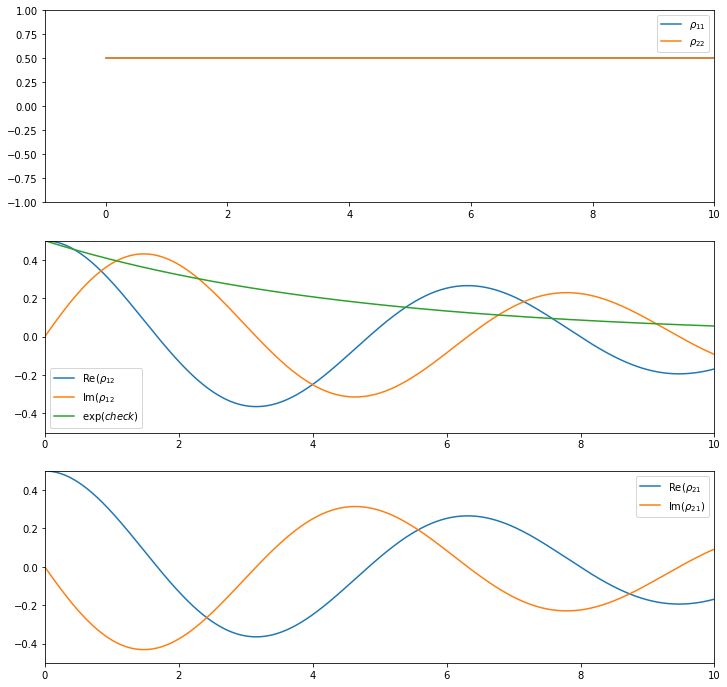

In [13]:


N = 2                                    # Length of Hilbert Space
tmin = 0                                 # Start time of the simulation
tmax = 10                                # End time of the simulation
psi2= basis(N,0)+basis(N,1)              # Spin (/0>+/1>)
psi2= psi2.unit()                        # Spin (/0>+/1>)/sqrt(2)

kb=1.38e-23
T=1000
wl = 1 
nther=1/(1-np.exp(wl/kb*T)) 
H = 0.5 * wl * sigmaz()
gamma = 0.1
gamma_plus = gamma*(1+nther)
gamma_minus = gamma*nther

#C_ops = [np.sqrt(gamma_minus) * sigmam(),np.sqrt(gamma) * sigmaz(),np.sqrt(gamma_plus) * sigmap()]
C_ops= np.sqrt(gamma) * sigmax()
result = mesolve(H,psi2 , times, C_ops)

figure_size =  [12,12]
plt.figure(figsize = figure_size)

plt.subplot(311)
plt.xlim(tmin-1, tmax)
plt.ylim(-1, 1)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
plt.legend()


plt.subplot(312)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-2.2*(gamma_plus+gamma_minus)*times), label=r'exp($check$)');
plt.legend()

plt.subplot(313)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 